# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

tickers = ["BTC", "ETH"]
crypto = pd.DataFrame([my_btc, my_eth], index=tickers)

crypto

,0
BTC,1.2
ETH,5.3


In [12]:
# Crypto API URLs
listing_url = "https://api.alternative.me/v2/listings/"
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [15]:
listing_data = requests.get(listing_url).json()

In [7]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
btc_price

77022.0465

In [9]:
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18684518,
   'total_supply': 18684518,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 61593.0,
     'volume_24h': 86583134312,
     'market_cap': 1153143173440,
     'percentage_change_1h': -0.405292004270724,
     'percentage_change_24h': -2.69366185899565,
     'percentage_change_7d': 6.07563086802017,
     'percent_change_1h': -0.405292004270724,
     'percent_change_24h': -2.69366185899565,
     'percent_change_7d': 6.07563086802017},
    'CAD': {'price': 77022.0465,
     'volume_24h': 108272209457.156,
     'market_cap': 1442005538386.72,
     'percent_change_1h': -0.405292004270724,
     'percent_change_24h': -2.69366185899565,
     'percent_change_7d': 6.07563086802017}},
   'last_updated': 1618614206}},
 'metadata': {'timestamp': 1618614206,
  'num_cryptocurrencies': 1314,
  'error': None}}

In [8]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
eth_price

3037.176885

In [10]:
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115498224,
   'total_supply': 115498224,
   'max_supply': 0,
   'quotes': {'USD': {'price': 2428.77,
     'volume_24h': 44870842158,
     'market_cap': 281138501377,
     'percentage_change_1h': -0.635795647671596,
     'percentage_change_24h': -4.08231890478704,
     'percentage_change_7d': 16.6916147458086,
     'percent_change_1h': -0.635795647671596,
     'percent_change_24h': -4.08231890478704,
     'percent_change_7d': 16.6916147458086},
    'CAD': {'price': 3037.176885,
     'volume_24h': 56110988118.579,
     'market_cap': 351563695971.939,
     'percent_change_1h': -0.635795647671596,
     'percent_change_24h': -4.08231890478704,
     'percent_change_7d': 16.6916147458086}},
   'last_updated': 1618614253}},
 'metadata': {'timestamp': 1618614253,
  'num_cryptocurrencies': 1314,
  'error': None}}

In [9]:
# Compute current value of my crpto
btc_value = my_btc * btc_price
eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $86794.55
The current value of your 5.3 ETH is $11846.73


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [12]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
stock_df

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-03-17 00:00:00-04:00  113.55  113.9778  113.48  113.87  5023810  394.53   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-17 00:00:00-04:00  398.12  393.3  397.22  61876016

In [13]:
# Pick AGG and SPY close prices
agg_close = float(stock_df["AGG"]["close"])
spy_close = float(stock_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $113.87
Current SPY closing price: $397.22


In [14]:
# Compute the current value of shares
agg_value = agg_close * my_agg
spy_value = spy_close * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19861.00
The current value of your 200 AGG shares is $22774.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
stocks = agg_value + spy_value
crypto = (btc_value + eth_value)
df_savings = pd.DataFrame([crypto, stocks])
df_savings.columns = ['amount']
df_savings.index = ['crypto', 'shares'] 
# Display savings DataFrame
display(df_savings)

,amount
crypto,98641.279219
shares,42635.000000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

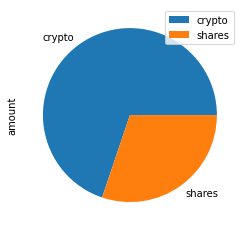

In [16]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + stocks

# Validate saving health
if total_savings >= emergency_fund:
    print(f"Congratulations! You you have enough money in your emergency fund.")
else:
    print(f"Better keep saving!") 

Congratulations! You you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

### Note: the Alpaca API offers a maximum of 1000 days of data, which, given 252 trading days each year, allows for slightly less than 5 year's of data.

In [25]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the stock tickers
tickers = ["SPY", "AGG"]
df_1000 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_1000.sort_index().head()

AGG                                       SPY  \
                             open    high     low   close   volume     open   
time                                                                          
2017-03-29 00:00:00-04:00  108.48  108.62  108.46  108.60  1635068  235.010   
2017-03-30 00:00:00-04:00  108.52  108.58  108.38  108.41  1611863  235.490   
2017-03-31 00:00:00-04:00  108.44  108.53  108.42  108.52  3151075  235.905   
2017-04-03 00:00:00-04:00  108.31  108.68  108.30  108.67  3857775  235.800   
2017-04-04 00:00:00-04:00  108.61  108.65  108.52  108.56  1482935  235.000   

                                                              
                             high      low   close    volume  
time                                                          
2017-03-29 00:00:00-04:00  235.81  234.725  235.59  40664024  
2017-03-30 00:00:00-04:00  236.52  235.270  236.27  40604487  
2017-03-31 00:00:00-04:00  236.51  235.680  235.71  47583793  
2017-04-03 00:00:00-04:00  236.03  233.910  235.37  58627715  
2017-04-04 00:00:00-04:00  235.58  234.555  235.51  43130784

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_MC = MCSimulation(
    portfolio_data = df_1000,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
retirement_MC.portfolio_data.tail()

AGG                                        \
                             open      high      low   close     volume   
time                                                                      
2021-03-12 00:00:00-05:00  113.88  113.9100  113.705  113.79  4339393.0   
2021-03-15 00:00:00-04:00  113.60  114.0100  113.600  113.94  4210749.0   
2021-03-16 00:00:00-04:00  113.97  114.0320  113.780  113.87  3977851.0   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.480  113.87  5023810.0   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.200  113.42  6077516.0   

                                            SPY                           \
                          daily_return     open     high     low   close   
time                                                                       
2021-03-12 00:00:00-05:00    -0.005680  392.070  394.210  391.20  394.09   
2021-03-15 00:00:00-04:00     0.001318  394.330  396.685  392.03  396.47   
2021-03-16 00:00:00-04:00    -0.000614  397.070  397.830  395.08  395.94   
2021-03-17 00:00:00-04:00     0.000000  394.530  398.120  393.30  397.22   
2021-03-18 00:00:00-04:00    -0.003952  394.475  396.720  390.75  391.41   

                                                    
                               volume daily_return  
time                                                
2021-03-12 00:00:00-05:00  56997361.0     0.001499  
2021-03-15 00:00:00-04:00  64471980.0     0.006039  
2021-03-16 00:00:00-04:00  65719794.0    -0.001337  
2021-03-17 00:00:00-04:00  61876016.0     0.003233  
2021-03-18 00:00:00-04:00  98794050.0    -0.014627

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003680,1.004464,1.005474,1.000936,1.000626,1.002054,0.997504,0.998592,0.999233,1.002683,...,1.006482,0.999082,0.997409,0.999997,1.004557,0.994904,0.994854,0.997136,1.003194,0.996903
2,1.006647,1.007008,1.002159,1.006484,1.003086,1.007299,1.007983,0.996572,0.992373,0.998581,...,1.003069,0.992192,1.012043,0.994309,1.000095,1.000427,0.991141,1.002888,1.003568,0.989373
3,1.014630,0.999327,0.988329,0.992003,1.001077,1.004550,1.012820,0.997016,0.996416,1.006821,...,0.995721,0.998969,1.015610,0.988795,1.002657,1.000415,0.990016,1.006735,1.004257,0.996204
4,1.013543,0.999417,0.993585,0.990701,0.998286,1.000680,1.013173,0.994534,0.988875,1.011940,...,0.990468,1.002759,1.008981,0.983971,0.995671,1.003251,0.993926,1.000987,0.998614,0.994254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.486598,5.980208,9.831413,4.143590,2.750224,7.787919,30.500965,4.568279,3.893525,4.003397,...,9.993268,4.172794,4.096440,6.550692,5.805220,16.733902,5.082360,7.213878,3.971351,9.509779
7557,5.544090,6.008130,9.828683,4.180386,2.767765,7.778095,30.575122,4.580751,3.885876,3.986136,...,9.938843,4.191138,4.110044,6.535475,5.736173,16.713078,5.094627,7.241468,3.983138,9.518600
7558,5.517236,6.010183,9.857499,4.190691,2.758719,7.719821,30.331601,4.532467,3.891422,4.031060,...,9.870871,4.183369,4.098748,6.542905,5.775224,16.651494,5.089273,7.133713,3.994896,9.585634
7559,5.522668,5.965195,9.873300,4.180739,2.766125,7.721207,30.241065,4.523570,3.848769,4.037907,...,9.879098,4.145620,4.094358,6.555672,5.700590,16.604549,5.076816,7.119637,3.983043,9.552065


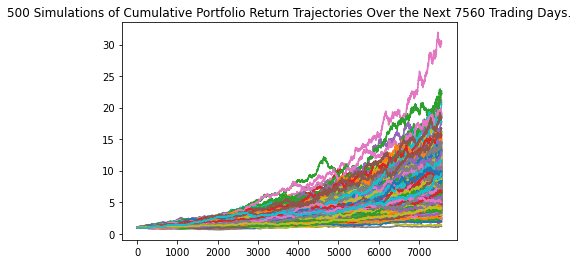

In [26]:
# Plot simulation outcomes
plot = retirement_MC.plot_simulation()

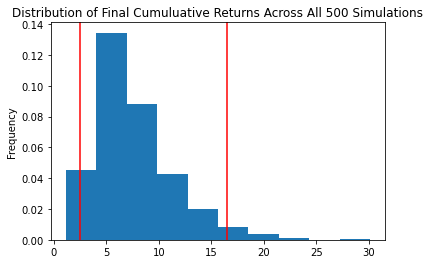

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = retirement_MC.plot_distribution()

### Retirement Analysis

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
stats = retirement_MC.summarize_cumulative_return()


# Print summary statistics
print(stats)

count           500.000000
mean              7.586634
std               3.765869
min               1.140692
25%               4.866988
50%               6.731359
75%               9.492940
max              30.145159
95% CI Lower      2.535652
95% CI Upper     16.479032
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50713.05 and $329580.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $76069.57 and $494370.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
shrt_retirement_MC = MCSimulation(
    portfolio_data = df_1000,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
shrt_retirement_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999057,1.001086,0.996321,0.993833,1.007056,1.005491,1.002451,0.994054,1.003643,1.000497,...,0.995514,0.995513,1.006034,0.999323,0.997401,1.007080,1.009878,1.004810,0.997145,0.998812
2,1.000633,1.000350,0.998233,0.993380,1.014454,1.009148,1.013418,0.987162,1.002700,1.009798,...,0.993475,1.010296,1.007859,1.001523,1.002535,1.004771,1.001941,1.012484,0.999334,0.995922
3,0.998175,0.999590,0.997449,1.001623,1.008762,1.006215,1.020319,0.988879,1.001533,1.011774,...,0.989739,1.011078,1.009684,0.994633,0.996988,1.003170,0.994306,1.015370,1.004315,0.988048
4,0.999855,1.005326,0.992696,1.003596,1.008432,1.010819,1.027610,0.988440,1.008304,1.013497,...,0.996832,1.003514,1.005037,0.997443,0.993026,1.003116,0.999020,1.021164,1.002049,0.993467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.283427,1.396580,1.767680,1.482461,1.307400,1.712635,1.644281,1.682581,0.909483,1.822987,...,1.367688,2.285875,1.314787,1.493011,1.342679,1.589007,1.256055,1.606788,1.342133,1.072581
1257,1.277918,1.401047,1.772082,1.459039,1.315947,1.729420,1.641596,1.680002,0.907379,1.831726,...,1.368732,2.289436,1.312666,1.479117,1.340528,1.598637,1.255887,1.613659,1.336537,1.076026
1258,1.275928,1.396999,1.778916,1.448687,1.320185,1.716052,1.639991,1.656191,0.909852,1.837167,...,1.365218,2.283375,1.313063,1.474323,1.343895,1.597784,1.246601,1.615348,1.346740,1.066580
1259,1.273669,1.412194,1.775260,1.446573,1.316022,1.709385,1.616969,1.666485,0.909031,1.844252,...,1.372349,2.314816,1.309650,1.456443,1.346128,1.592809,1.230209,1.639019,1.332488,1.071643


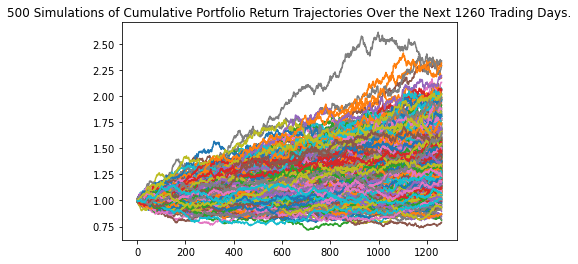

In [35]:
# Plot simulation outcomes
plot2 = shrt_retirement_MC.plot_simulation()

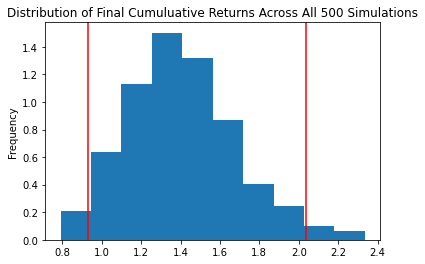

In [36]:
# Plot probability distribution and confidence intervals
dist_plot2 = shrt_retirement_MC.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
shrt_stats = shrt_retirement_MC.summarize_cumulative_return()

# Print summary statistics
print(shrt_stats)

count           500.000000
mean              1.403551
std               0.280627
min               0.791027
25%               1.209609
50%               1.372402
75%               1.574649
max               2.335557
95% CI Lower      0.931660
95% CI Upper      2.038683
Name: 1260, dtype: float64


In [38]:
# Set initial investment
shrt_initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_shrt = round(stats[8]*shrt_initial_investment,2)
ci_upper_shrt = round(stats[9]*shrt_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${shrt_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_shrt} and ${ci_upper_shrt}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $152139.14 and $988741.95


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_yr_retirement_MC = MCSimulation(
    portfolio_data = df_1000,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_yr_retirement_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989576,0.996698,1.005777,0.996107,1.015022,1.002323,0.983452,1.001614,1.001897,0.998485,...,0.999934,1.001739,0.997315,1.015024,0.997534,0.996543,1.001765,0.995924,1.001022,0.994308
2,0.987265,0.989518,1.008955,0.993960,1.022969,1.008065,0.978872,0.998553,1.003132,0.996896,...,0.999128,0.999871,1.005594,1.025089,0.994938,0.997222,1.001655,0.995387,0.994655,0.992058
3,0.991665,0.986713,1.009264,0.993434,1.017344,1.008259,0.979471,0.998527,1.007475,1.000537,...,1.003213,0.990164,1.011127,1.032019,0.999354,0.992515,0.999103,0.999746,0.995167,0.994499
4,0.997204,0.983601,1.015397,1.003396,1.017812,1.015269,0.984812,1.003814,1.012407,1.002454,...,0.991791,0.995154,1.015542,1.032383,1.005047,0.995475,1.006288,1.001176,0.994619,0.996225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.320386,2.194218,1.236405,1.418831,1.491154,2.850153,2.274601,1.939648,1.897422,1.339616,...,2.690504,2.325477,1.961019,1.491262,1.416680,2.015119,3.385255,2.283511,1.465380,1.327284
2517,1.319839,2.193121,1.230028,1.427659,1.482981,2.852285,2.270204,1.961032,1.879439,1.355561,...,2.656997,2.331393,1.957316,1.495745,1.425748,1.996207,3.410208,2.291884,1.460857,1.327702
2518,1.318614,2.194500,1.232562,1.425323,1.497191,2.855818,2.265981,1.963042,1.899570,1.352804,...,2.656539,2.336478,1.944594,1.490486,1.435003,2.006359,3.433023,2.298965,1.460066,1.347436
2519,1.331384,2.217438,1.237609,1.426882,1.485595,2.861089,2.271875,1.970756,1.906805,1.345565,...,2.630507,2.342416,1.946357,1.501399,1.418379,2.024357,3.453061,2.293919,1.466014,1.353841


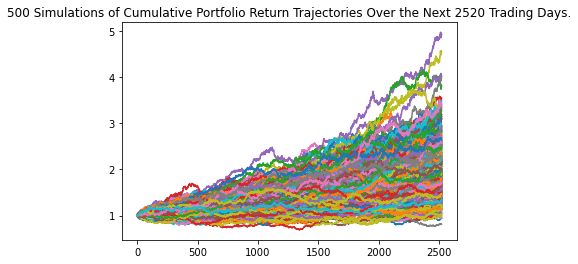

In [45]:
# Plot simulation outcomes
plot3 = ten_yr_retirement_MC.plot_simulation()

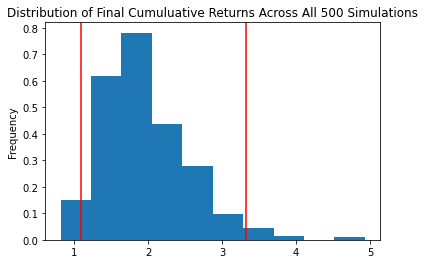

In [46]:
# Plot probability distribution and confidence intervals
dist_plot3 = ten_yr_retirement_MC.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_yr_stats = ten_yr_retirement_MC.summarize_cumulative_return()

# Print summary statistics
print(ten_yr_stats)

count           500.000000
mean              1.950950
std               0.578795
min               0.811430
25%               1.532077
50%               1.875161
75%               2.241791
max               4.931499
95% CI Lower      1.086751
95% CI Upper      3.328227
Name: 2520, dtype: float64


In [48]:
# Set initial investment
ten_yr_initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten_yr = round(stats[8]*ten_yr_initial_investment,2)
ci_upper_ten_yr = round(stats[9]*ten_yr_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_yr} and ${ci_upper_ten_yr}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $152139.14 and $988741.95
